<a href="https://colab.research.google.com/github/mattdale87/Data-Science-Project/blob/main/Martino_Dalessandro_travel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TRAVEL DATASET



**Objetivo** : predecir la satifaccion de pasajeros de lineas aereas


## Introduccion

***Contexto empresarial***:
 Algo muy comun en cualquier empresa es saber si el cliente esta conforme/satisfecho con el servicio brindado, por eso utilizaremos una encuesta a pasajeros de aerolineas para analizar y predecir sobre: pasajeros de aerolineas y como califican los distintos servicios de vuelos aereos.


***Problema empresarial***:
 El conjunto de datos que utilizaremos se encuesto distintos usuarios donde puntuaron cada servicio y si estan satisfechos o no, con este analisis se busca predecir el tipo de usuario si va a estar satisfecho o no. 

***Contexto analitico***:
 Ubicamos este dataset en el sitio de kaggle y nos llamo la antecion al tener distintos valores tanto categoricos como numericos para utilizarlos y analizar su realacion con el target ( de la variable "satisfaction" )

**Preguntas a responder a partir del conocimiento de los datos**

*   ¿Existe relacion de usuarios satisfechos entre genero y edad?
*   ¿Que cantidad de usuarios estan satisfechos o no segun la clase?
*   ¿Cuál es el delay total por pasajero/viaje ? y tiene una relación con el target?



Descarga del dataset sitio kaggle
[link text](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction)

# Exploracion de datos


In [ ]:
#Importamos librerias
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Concatenamos los archivos test.csv + train.csv y fusionamos en uno solo llamado travel.csv
#df_test=pd.read_csv('test.csv',sep=',')
#df_train=pd.read_csv('train.csv',sep=',')
#cnt=pd.concat([test,train],axis=0)
#cnt.info()

#cnd.to_csv('travel.csv')


In [ ]:
#Leemos el csv travel
df_travel=pd.read_csv('travel.csv',sep=',')
df_travel.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0.1                       129880 non-null  int64  
 1   Unnamed: 0                         129880 non-null  int64  
 2   id                                 129880 non-null  int64  
 3   Gender                             129880 non-null  object 
 4   Customer Type                      129880 non-null  object 
 5   Age                                129880 non-null  int64  
 6   Type of Travel                     129880 non-null  object 
 7   Class                              129880 non-null  object 
 8   Flight Distance                    129880 non-null  int64  
 9   Inflight wifi service              129880 non-null  int64  
 10  Departure/Arrival time convenient  129880 non-null  int64  
 11  Ease of Online booking             1298

El dataset esta formado por 26 columnas, 129880 filas, hay nulos a simple vista en la variable 'Arrival Delay in Minutes'
el dataset contiene target en la variable satifaction, por lo tanto el tipo de aprendisaje va a ser supervisado

In [ ]:
# Nocion de las variables que contiene el dataset
df_travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0.1                       129880 non-null  int64  
 1   Unnamed: 0                         129880 non-null  int64  
 2   id                                 129880 non-null  int64  
 3   Gender                             129880 non-null  object 
 4   Customer Type                      129880 non-null  object 
 5   Age                                129880 non-null  int64  
 6   Type of Travel                     129880 non-null  object 
 7   Class                              129880 non-null  object 
 8   Flight Distance                    129880 non-null  int64  
 9   Inflight wifi service              129880 non-null  int64  
 10  Departure/Arrival time convenient  129880 non-null  int64  
 11  Ease of Online booking             1298

DESCRIPCION DE VARIABLES 

Gender: Género de los pasajeros (Femenino, Masculino)

Customer Type: el tipo de cliente (cliente fiel, cliente desleal)

Age: La edad real de los pasajeros .

Type of Travel: Propósito del vuelo de los pasajeros (Viaje Personal, Viaje de Negocios)

Class: Clase de viaje en el avión de los pasajeros (Business, Eco, Eco Plus)
Flight Distance: la distancia de vuelo de este viaje

Inflight wifi service: Nivel de satisfacción del servicio wifi a bordo (0: No aplicable; 1-5)

Departure/Arrival time convenient: Nivel de satisfacción de la hora de salida/llegada conveniente

Ease of Online booking: Nivel de satisfacción de la reserva en línea

Gate location: nivel de satisfacción de la ubicación de la puerta

Food and drink: Nivel de satisfacción de Alimentos y bebidas

Online boarding: Nivel de satisfacción del embarque en línea

Seat comfort: Nivel de satisfacción de Confort del asiento

Inflight entertainment: Nivel de satisfacción del entretenimiento a bordo

On-board service: Nivel de satisfacción del servicio a bordo

Leg room service: Nivel de satisfacción del servicio de sala de piernas

Baggage handling: Nivel de satisfacción del manejo de equipaje

Checkin service: Nivel de satisfacción del servicio de Check-in

Inflight service: Nivel de satisfacción del servicio a bordo

Cleanliness: Nivel de satisfacción de Limpieza

Departure Delay in Minutes: Minutos de retraso en la salida

Arrival Delay in Minutes: Minutos de retraso en la llegada

satisfaction: Nivel de satisfacción de la aerolínea (Satisfacción, neutral o insatisfacción)


 Variables de tipo
1.  Cuantitativas: age, flight_distance, baggage_ahndling, Flight Distance , Inflight wifi service, Departure/Arrival, Ease of Online booking , Gate location , Food and drink , Online boarding , Seat comfort, Inflight entertainment , On-board service,  Leg room service    , Baggage handling     ,  Checkin service   ,  Inflight service   , Cleanliness    , Departure Delay in Minutes  y  Arrival Delay in Minutes  

2. Cualitativas: Gender , Customer Type, y  satisfaction 






# Data Wrangling


In [ ]:
# Eliminamos las dos primeras variables (unnamed) que serian como dos indices mas 

prediction_travel=df_travel.drop(columns=['Unnamed: 0','Unnamed: 0.1'],axis=1)
prediction_travel

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
129876,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
129877,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
129878,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
prediction_travel.describe().T

,count,mean,std,min,25%,50%,75%,max
id,129880.0,64940.500000,37493.270818,1.0,32470.75,64940.5,97410.25,129880.0
Age,129880.0,39.427957,15.119360,7.0,27.00,40.0,51.00,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.00,844.0,1744.00,4983.0
Inflight wifi service,129880.0,2.728696,1.329340,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,129880.0,3.057599,1.526741,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,129880.0,2.756876,1.401740,0.0,2.00,3.0,4.00,5.0
Gate location,129880.0,2.976925,1.278520,0.0,2.00,3.0,4.00,5.0
Food and drink,129880.0,3.204774,1.329933,0.0,2.00,3.0,4.00,5.0
Online boarding,129880.0,3.252633,1.350719,0.0,2.00,3.0,4.00,5.0
Seat comfort,129880.0,3.441361,1.319289,0.0,2.00,4.0,5.00,5.0


In [ ]:
#vemos la forma del data set, de cuantas filas y columnas tiene
prediction_travel.shape

(129880, 24)

In [ ]:
# Visualizamos que variables tienen como valor 0 
prediction_travel[["Age","Flight Distance","Inflight wifi service",
                   "Departure/Arrival time convenient","Ease of Online booking","Gate location","Food and drink",
                   "Online boarding","Seat comfort","Inflight entertainment","On-board service","Leg room service",
                   "Baggage handling","Checkin service","Inflight service","Cleanliness","Departure Delay in Minutes",
                   "Arrival Delay in Minutes"]]==0

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True
3,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
129876,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
129877,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
129878,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True


In [ ]:
# Sumamos los 0 individualmente
num_missing= (prediction_travel[["Age","Flight Distance","Inflight wifi service",
                   "Departure/Arrival time convenient","Ease of Online booking","Gate location","Food and drink",
                   "Online boarding","Seat comfort","Inflight entertainment","On-board service","Leg room service",
                   "Baggage handling","Checkin service","Inflight service","Cleanliness","Departure Delay in Minutes",
                   "Arrival Delay in Minutes"]]==0).sum()
print(num_missing)

Age                                      0
Flight Distance                          0
Inflight wifi service                 3916
Departure/Arrival time convenient     6681
Ease of Online booking                5682
Gate location                            1
Food and drink                         132
Online boarding                       3080
Seat comfort                             1
Inflight entertainment                  18
On-board service                         5
Leg room service                       598
Baggage handling                         0
Checkin service                          1
Inflight service                         5
Cleanliness                             14
Departure Delay in Minutes           73356
Arrival Delay in Minutes             72753
dtype: int64


In [ ]:
# Los remplazamos por Nulos 

prediction_travel[["Inflight wifi service","Departure/Arrival time convenient","Ease of Online booking","Gate location","Food and drink",
                   "Online boarding","Seat comfort","Inflight entertainment","On-board service","Leg room service",
                   "Checkin service","Inflight service","Cleanliness","Departure Delay in Minutes",
                   "Arrival Delay in Minutes"]]= prediction_travel[["Inflight wifi service",
                   "Departure/Arrival time convenient","Ease of Online booking","Gate location","Food and drink",
                   "Online boarding","Seat comfort","Inflight entertainment","On-board service","Leg room service",
                   "Checkin service","Inflight service","Cleanliness","Departure Delay in Minutes",
                   "Arrival Delay in Minutes"]].replace(0,np.nan)
print(prediction_travel.isnull().sum())

id                                       0
Gender                                   0
Customer Type                            0
Age                                      0
Type of Travel                           0
Class                                    0
Flight Distance                          0
Inflight wifi service                 3916
Departure/Arrival time convenient     6681
Ease of Online booking                5682
Gate location                            1
Food and drink                         132
Online boarding                       3080
Seat comfort                             1
Inflight entertainment                  18
On-board service                         5
Leg room service                       598
Baggage handling                         0
Checkin service                          1
Inflight service                         5
Cleanliness                             14
Departure Delay in Minutes           73356
Arrival Delay in Minutes             73146
satisfactio

In [ ]:
# Vemos como quedo el conjunto

prediction_travel.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5.0,4.0,3.0,...,5.0,5.0,5.0,5,2.0,5.0,5.0,50.0,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1.0,1.0,3.0,...,4.0,4.0,4.0,4,3.0,4.0,5.0,NaN,NaN,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2.0,NaN,2.0,...,2.0,4.0,1.0,3,2.0,2.0,2.0,NaN,NaN,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,NaN,NaN,NaN,...,1.0,1.0,1.0,1,3.0,1.0,4.0,NaN,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2.0,3.0,4.0,...,2.0,2.0,2.0,2,4.0,2.0,4.0,NaN,20.0,satisfied


In [ ]:
prediction_travel.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,129880.0,NaN,NaN,NaN,64940.5,37493.270818,1.0,32470.75,64940.5,97410.25,129880.0
Gender,129880,2,Female,65899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Type,129880,2,Loyal Customer,106100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,129880.0,NaN,NaN,NaN,39.427957,15.11936,7.0,27.0,40.0,51.0,85.0
Type of Travel,129880,2,Business travel,89693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Class,129880,3,Business,62160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flight Distance,129880.0,NaN,NaN,NaN,1190.316392,997.452477,31.0,414.0,844.0,1744.0,4983.0
Inflight wifi service,125964.0,NaN,NaN,NaN,2.813526,1.258336,1.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,123199.0,NaN,NaN,NaN,3.223411,1.386673,1.0,2.0,3.0,4.0,5.0
Ease of Online booking,124198.0,NaN,NaN,NaN,2.883001,1.30044,1.0,2.0,3.0,4.0,5.0


In [ ]:
# Vemos que variables tienen nulos

df_travel.isnull()

,Unnamed: 0.1,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
129876,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
129877,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
129878,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Sumamos los nulos por variable
prediction_travel.isnull().sum()

id                                       0
Gender                                   0
Customer Type                            0
Age                                      0
Type of Travel                           0
Class                                    0
Flight Distance                          0
Inflight wifi service                 3916
Departure/Arrival time convenient     6681
Ease of Online booking                5682
Gate location                            1
Food and drink                         132
Online boarding                       3080
Seat comfort                             1
Inflight entertainment                  18
On-board service                         5
Leg room service                       598
Baggage handling                         0
Checkin service                          1
Inflight service                         5
Cleanliness                             14
Departure Delay in Minutes           73356
Arrival Delay in Minutes             73146
satisfactio

In [ ]:
#instalamos missingo
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importamos librerias 
import seaborn as sns
import pandas as pd
import missingno as msno

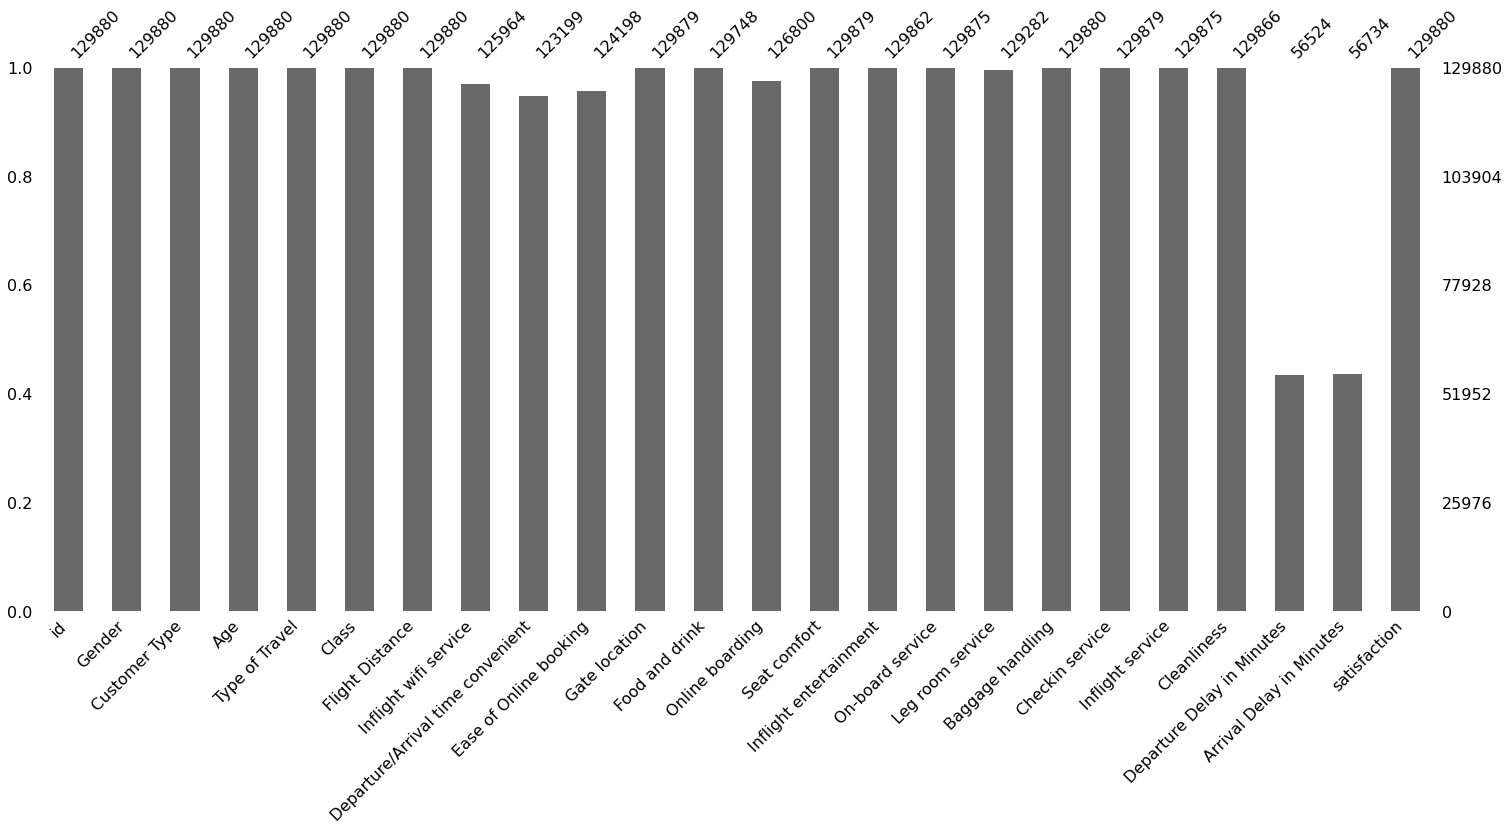

In [ ]:
#visualizamos con un barplot
msno.bar(prediction_travel);

vemos los nulos en las variables que faltan representadas en las barras incompletas

<Axes: >

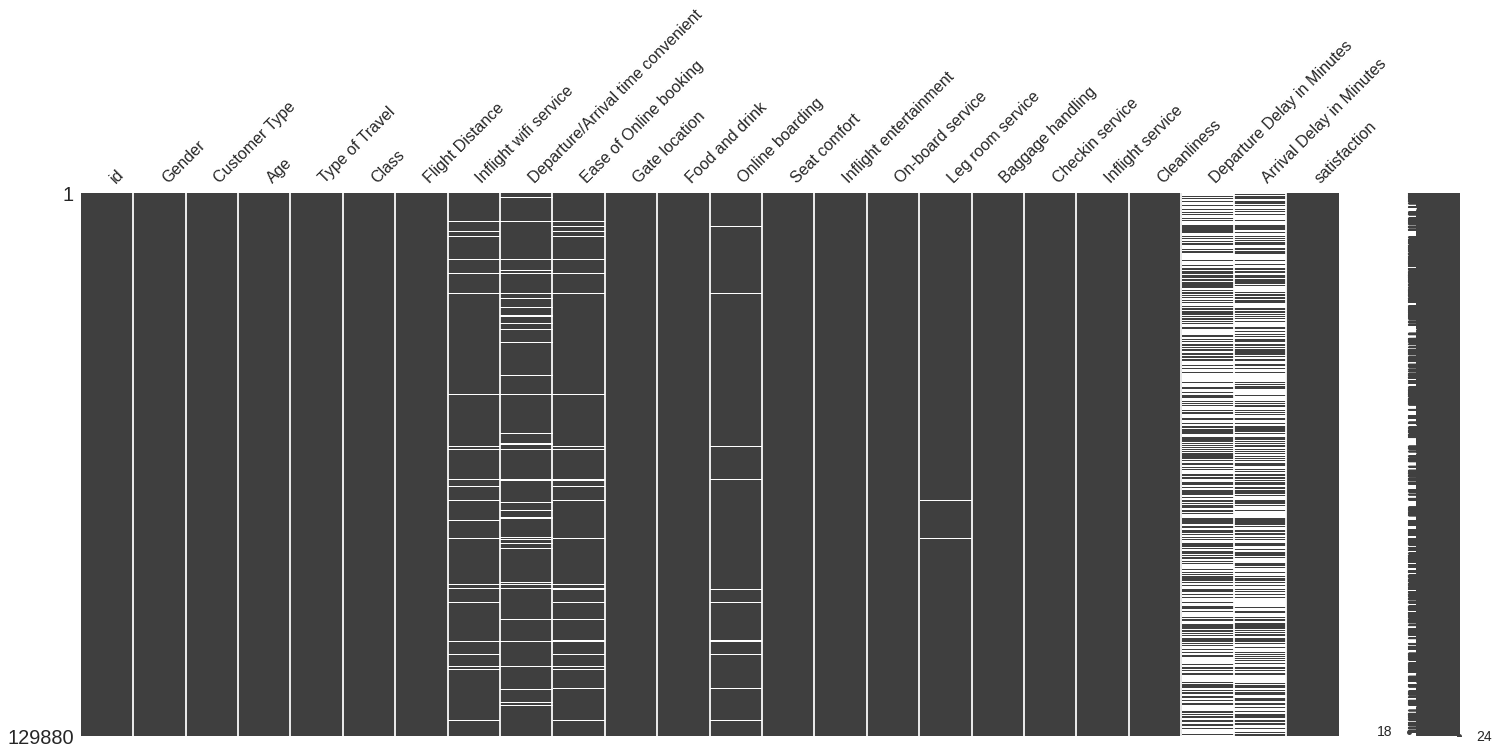

In [ ]:
#vamos a observar la distrubucion de los nulos con matrixplot y ver si tienen relacion entre variables
msno.matrix(prediction_travel)

<Axes: >

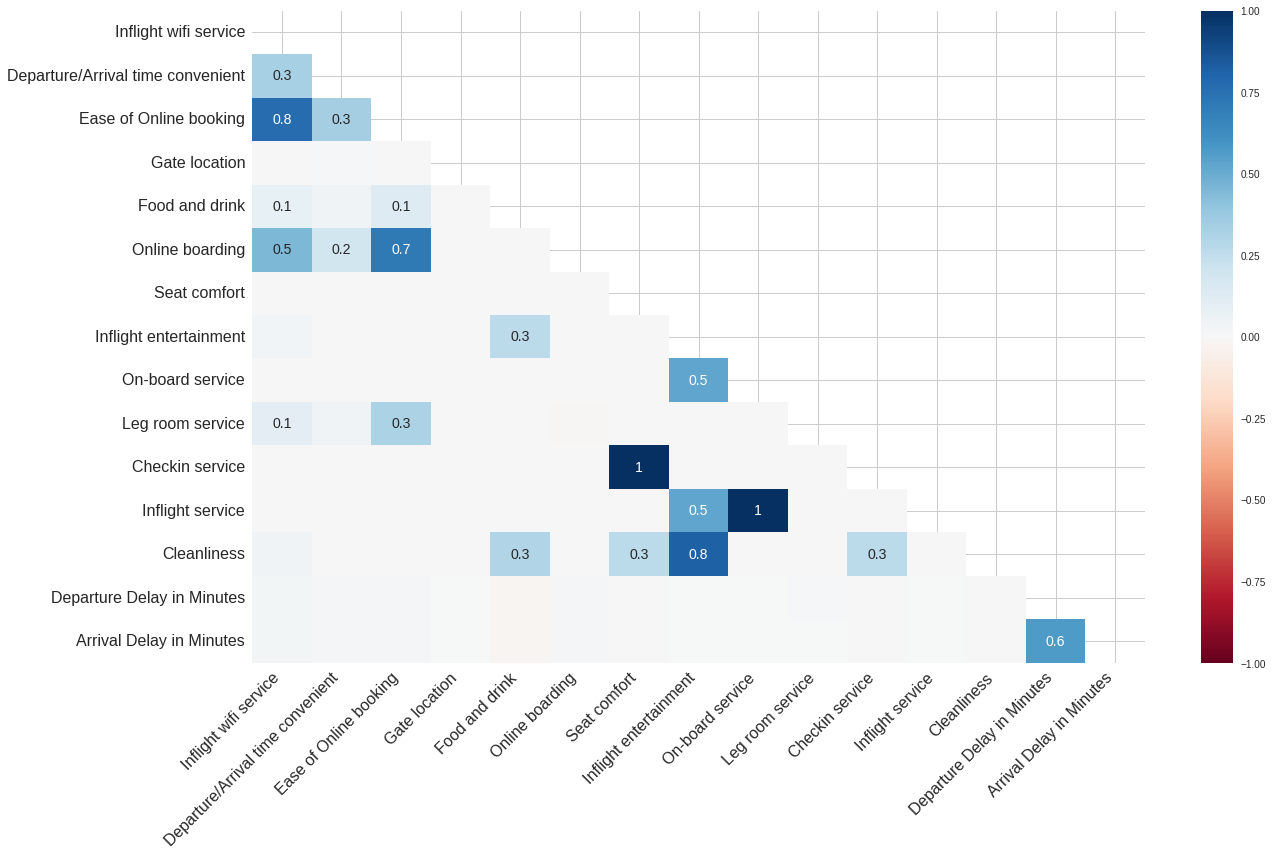

In [ ]:
#hacemos un heatmap
msno.heatmap(prediction_travel)

observamos que tienen una coorrelacion fuerte positiva en los nulos de Ease of Online booking con Inflight wifi service, checkin service con seat comfort, Cleanliness con Inflight entertainment, tambien en inflight service y On-board service, y otros que tambien tienen una coorrelacion pero no tan fuerte son Departure Delay in Minutes con Arrival Delay in Minutes y Online boarding con Ease of Onie booking. 

In [ ]:
# LLenamos los nulos con simple imputer

from sklearn.impute import SimpleImputer
from numpy import isnan
df_copy=prediction_travel.copy()


In [ ]:
# Creamos un Numpy con los valores

valores = df_copy[["Inflight wifi service","Departure/Arrival time convenient","Ease of Online booking","Gate location","Food and drink",
                   "Online boarding","Seat comfort","Inflight entertainment","On-board service","Leg room service",
                   "Checkin service","Inflight service","Cleanliness","Departure Delay in Minutes",
                   "Arrival Delay in Minutes"]].values
valores

array([[ 5.,  4.,  3., ...,  5., 50., 44.],
       [ 1.,  1.,  3., ...,  5., nan, nan],
       [ 2., nan,  2., ...,  2., nan, nan],
       ...,
       [ 1.,  1.,  1., ...,  4.,  7., 14.],
       [ 1.,  1.,  1., ...,  1., nan, nan],
       [ 1.,  3.,  3., ...,  1., nan, nan]])

In [ ]:
# definir el imputador
imputador = SimpleImputer(missing_values = np.nan, strategy='median')
transformados=imputador.fit_transform(valores)
transformados


array([[ 5.,  4.,  3., ...,  5., 50., 44.],
       [ 1.,  1.,  3., ...,  5., 16., 17.],
       [ 2.,  3.,  2., ...,  2., 16., 17.],
       ...,
       [ 1.,  1.,  1., ...,  4.,  7., 14.],
       [ 1.,  1.,  1., ...,  1., 16., 17.],
       [ 1.,  3.,  3., ...,  1., 16., 17.]])

In [ ]:
# Utilizamos el array para generar un nuevo data set

transformados= pd.DataFrame(transformados)
transformados= transformados.rename(columns={0:"Inflight wifi service",1:"Departure/Arrival time convenient",2:"Ease of Online booking",3:"Gate location",4:"Food and drink",
                   5:"Online boarding",6:"Seat comfort",7:"Inflight entertainment",8:"On-board service",9:"Leg room service",
                   10:"Checkin service",11:"Inflight service",12:"Cleanliness",13:"Departure Delay in Minutes",
                   14:"Arrival Delay in Minutes"})
print(transformados.head().round(2))

   Inflight wifi service  Departure/Arrival time convenient  \
0                    5.0                                4.0   
1                    1.0                                1.0   
2                    2.0                                3.0   
3                    3.0                                3.0   
4                    2.0                                3.0   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                     3.0            4.0             3.0              4.0   
1                     3.0            1.0             5.0              4.0   
2                     2.0            4.0             2.0              2.0   
3                     3.0            2.0             3.0              4.0   
4                     4.0            3.0             4.0              1.0   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0           3.0                     5.0               5.0               5.0   


In [ ]:
# Eliminamos las columnas con nulos del dataset completo
df_snull=df_copy.dropna(1)
df_snull.info()

<ipython-input-25-d18789bf4984>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df_snull=df_copy.dropna(1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                129880 non-null  int64 
 1   Gender            129880 non-null  object
 2   Customer Type     129880 non-null  object
 3   Age               129880 non-null  int64 
 4   Type of Travel    129880 non-null  object
 5   Class             129880 non-null  object
 6   Flight Distance   129880 non-null  int64 
 7   Baggage handling  129880 non-null  int64 
 8   satisfaction      129880 non-null  object
dtypes: int64(4), object(5)
memory usage: 8.9+ MB


In [ ]:
transformados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Inflight wifi service              129880 non-null  float64
 1   Departure/Arrival time convenient  129880 non-null  float64
 2   Ease of Online booking             129880 non-null  float64
 3   Gate location                      129880 non-null  float64
 4   Food and drink                     129880 non-null  float64
 5   Online boarding                    129880 non-null  float64
 6   Seat comfort                       129880 non-null  float64
 7   Inflight entertainment             129880 non-null  float64
 8   On-board service                   129880 non-null  float64
 9   Leg room service                   129880 non-null  float64
 10  Checkin service                    129880 non-null  float64
 11  Inflight service                   1298

In [ ]:
# Creamos un nuevo dataset con la concatenacion de df_snull y transformados

dftravel=pd.concat([df_snull,transformados],axis=1)
dftravel.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Baggage handling,satisfaction,Inflight wifi service,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,satisfied,5.0,...,4.0,3.0,5.0,5.0,5.0,2.0,5.0,5.0,50.0,44.0
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,4,satisfied,1.0,...,4.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,16.0,17.0
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,3,neutral or dissatisfied,2.0,...,2.0,2.0,2.0,4.0,1.0,2.0,2.0,2.0,16.0,17.0
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,1,satisfied,3.0,...,4.0,4.0,1.0,1.0,1.0,3.0,1.0,4.0,16.0,6.0
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,satisfied,2.0,...,1.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0,16.0,20.0


In [ ]:
dftravel.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Baggage handling                     0
satisfaction                         0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [ ]:
#renombramos algunas variables que tienen mayusculas y espacios
dftravel= dftravel.rename(columns={'Gender': 'gender'})
dftravel= dftravel.rename(columns={'Customer Type': 'customer_type'})
dftravel= dftravel.rename(columns={'Age': 'age'})
dftravel= dftravel.rename(columns={'Type of Travel': 'type_of_travel'})
dftravel= dftravel.rename(columns={'Class': 't_class'})
dftravel= dftravel.rename(columns={'Flight Distance': 'flight_distance'})
dftravel= dftravel.rename(columns={'Inflight wifi service': 'inflight_wifi_service'})
dftravel= dftravel.rename(columns={'Departure/Arrival time convenient': 'departure_arrival_time_convenient'})
dftravel= dftravel.rename(columns={'Ease of Online booking': 'ease_of_online_booking'})
dftravel= dftravel.rename(columns={'Baggage handling': 'baggage_handling'})
dftravel= dftravel.rename(columns={'Checkin service': 'checkin_service'})
dftravel= dftravel.rename(columns={'Inflight service': 'inflight_service'})
dftravel= dftravel.rename(columns={'Cleanliness': 'cleanliness'})
dftravel= dftravel.rename(columns={'Departure Delay in Minutes': 'departure_delay_in_minutes'})
dftravel= dftravel.rename(columns={'Arrival Delay in Minutes': 'arrival_delay_in_minutes'})
dftravel= dftravel.rename(columns={'Online boarding': 'online_boarding'})
dftravel= dftravel.rename(columns={'On-board service': 'on_board_service'})
dftravel= dftravel.rename(columns={'Leg room service': 'leg_room_service'})
dftravel= dftravel.rename(columns={'Food and drink': 'food_and_drink'})
dftravel= dftravel.rename(columns={'Seat comfort': 'seat_comfort'})
dftravel= dftravel.rename(columns={'Gate location': 'gate_location'})
dftravel= dftravel.rename(columns={'Leg room service': 'leg_room_service'})
dftravel= dftravel.rename(columns={'Inflight entertainment': 'inflight_entertainment'})
dftravel.head()

,id,gender,customer_type,age,type_of_travel,t_class,flight_distance,baggage_handling,satisfaction,inflight_wifi_service,...,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,satisfied,5.0,...,4.0,3.0,5.0,5.0,5.0,2.0,5.0,5.0,50.0,44.0
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,4,satisfied,1.0,...,4.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,16.0,17.0
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,3,neutral or dissatisfied,2.0,...,2.0,2.0,2.0,4.0,1.0,2.0,2.0,2.0,16.0,17.0
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,1,satisfied,3.0,...,4.0,4.0,1.0,1.0,1.0,3.0,1.0,4.0,16.0,6.0
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,satisfied,2.0,...,1.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0,16.0,20.0


In [ ]:
#verificamos que no hay nulos en el dataset
dftravel.isnull()

,id,gender,customer_type,age,type_of_travel,t_class,flight_distance,baggage_handling,satisfaction,inflight_wifi_service,...,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
129876,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
129877,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
129878,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#sumamos los nulos para verificar que no haya
dftravel.isnull().sum()

id                                   0
gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
t_class                              0
flight_distance                      0
baggage_handling                     0
satisfaction                         0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
on_board_service                     0
leg_room_service                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
dtype: int64

# Analisis
objetivo predecir que tipo de usuario puede estar satisfecho segun que clases y datos , o tipos de usuarios pueden llegar a estar mas satisfechos que otros



In [ ]:
from ast import In
## Cargamos los packages
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import os
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
bokeh.io.output_notebook(INLINE)



In [ ]:
dftravel.head()

,id,gender,customer_type,age,type_of_travel,t_class,flight_distance,baggage_handling,satisfaction,inflight_wifi_service,...,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,satisfied,5.0,...,4.0,3.0,5.0,5.0,5.0,2.0,5.0,5.0,50.0,44.0
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,4,satisfied,1.0,...,4.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,16.0,17.0
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,3,neutral or dissatisfied,2.0,...,2.0,2.0,2.0,4.0,1.0,2.0,2.0,2.0,16.0,17.0
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,1,satisfied,3.0,...,4.0,4.0,1.0,1.0,1.0,3.0,1.0,4.0,16.0,6.0
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,satisfied,2.0,...,1.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0,16.0,20.0


In [ ]:
dftravel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   t_class                            129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   baggage_handling                   129880 non-null  int64  
 8   satisfaction                       129880 non-null  object 
 9   inflight_wifi_service              129880 non-null  float64
 10  departure_arrival_time_convenient  129880 non-null  float64
 11  ease_of_online_booking             1298

# Analisis univariado

1. Preguntas que nos surgen:
que diferencia de usuarios estan satisfechos, segun el genero y edad?

In [ ]:
#contamos la cantidad de usuarios segun genero
genero_count= dftravel.groupby('gender')[['satisfaction']].count()
genero_count


,satisfaction
gender,
Female,65899
Male,63981


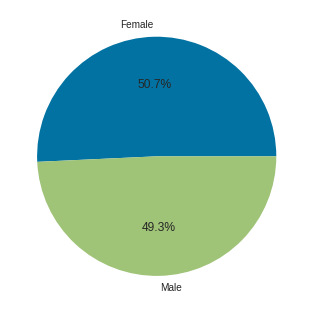

In [ ]:
plt.pie(dftravel.gender.value_counts(), labels = ["Female", "Male"], autopct = '%1.1f%%');

Observamos que el nivel de satisfacción es poco superior en el genero femenino



In [ ]:
#Creamos grupos 
satisfaction_group=dftravel.groupby('satisfaction').count()
satisfaction_group


,id,gender,customer_type,age,type_of_travel,t_class,flight_distance,baggage_handling,inflight_wifi_service,departure_arrival_time_convenient,...,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
satisfaction,,,,,,,,,,,,,,,,,,,,,
neutral or dissatisfied,73452,73452,73452,73452,73452,73452,73452,73452,73452,73452,...,73452,73452,73452,73452,73452,73452,73452,73452,73452,73452
satisfied,56428,56428,56428,56428,56428,56428,56428,56428,56428,56428,...,56428,56428,56428,56428,56428,56428,56428,56428,56428,56428


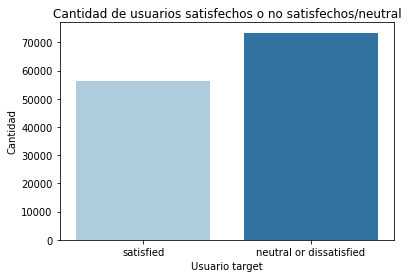

In [ ]:
fig,ax=plt.subplots(figsize=(6,4))
sns.countplot(data = dftravel, x = 'satisfaction', palette ="Paired")
plt.title('Cantidad de usuarios satisfechos o no satisfechos/neutral')
ax.set_xlabel("Usuario target")
ax.set_ylabel("Cantidad");

Notamos que predominan los usuarios insatisfechos/neutral, en el grafico se 

obserba una diferencia levemente superior a 10.000 a simple vista

<ipython-input-88-c0547a962be6>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dftravel['age'], shade=True);


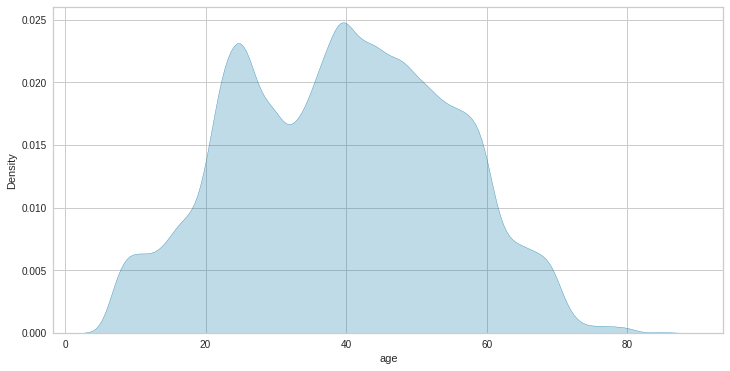

In [ ]:
#creamos un grafico para ver la densidad por edad de pasajeros del dataset
plt.figure(figsize = (12,6))
sns.kdeplot(data=dftravel['age'], shade=True);

En el grafico observamos mas respuestas de pasajeros en el rango de 20, 40 y 50 años, luego disminuye la cantidad 

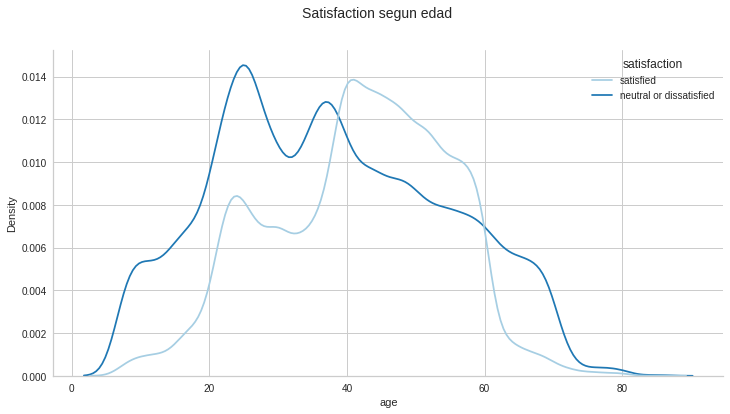

In [ ]:
#comparamos satisfecho e insatisfecho segun edead
plt.figure(figsize = (12,6))
sns.kdeplot(data = dftravel, x= "age", hue = "satisfaction",  palette ="Paired")
plt.suptitle("Satisfaction segun edad", fontsize = 14,)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

En el graficos notamos que hay mas pasajeros satisfechos de 40 a 60 años aprox, y entre los 20 y 40 hay mas cantidad de pasajeros insatisfechos

# Analisis bivariado


<Figure size 864x432 with 0 Axes>

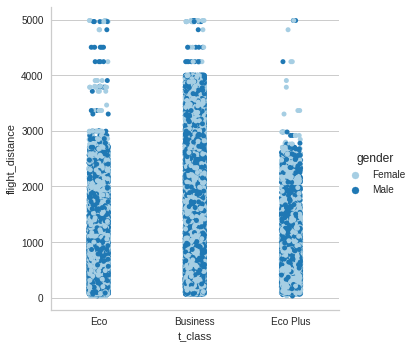

In [ ]:
#los diferenciamos por clases y distancias de vuelo
plt.figure(figsize = (12,6))
sns.catplot(x='t_class', y='flight_distance', hue='gender', data=dftravel, palette ="Paired");


en el grafico se visualiza que en la clase business suelen hacer mas pasajeros viajes mas largos, a diferencia de la clase eco y eco plus predominan que sus pasajeros hacen viajes de 0 a 3000 de distancia 

Que cantidad de usuarios estan satisfechos o no segun la clase?

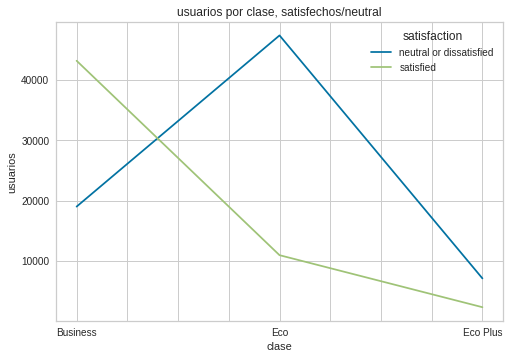

In [ ]:
graf1= dftravel.groupby(['t_class', 'satisfaction']) 
ax = graf1.size().unstack().plot()
ax.set_title('usuarios por clase, satisfechos/neutral') 
ax.set_xlabel('clase')
ax.set_ylabel('usuarios');

Notamos que la clase business es donde se encuentra la mayor cantidad de pasajeros satisfechos por encima de 4000 y la eco clase es donde mas pasajeros estan insatisfechos , tambien notamos que la clase eco plus esta bastante similar entre satisfecho y no satisfechos/neutral

Cuál es el delay total por pasajero/viaje ? Tiene una relación  con él target?

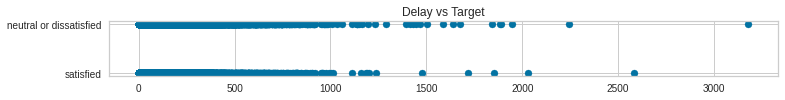

In [ ]:
#creamos una nueva variable para sumar el delay total por pasajero
dftravel['delay_t'] = dftravel['departure_delay_in_minutes']+ dftravel ['arrival_delay_in_minutes']

#visualizamos si hay diferencia entre los satifechos o no segun delay total
plt.figure(figsize = (12,1))
plt.scatter(dftravel['delay_t'], dftravel['satisfaction'])
plt.title ("Delay vs Target");



En el grafico se ve que los dos target tienen delay pero hay una disminucion en los pasajeros satisfechos


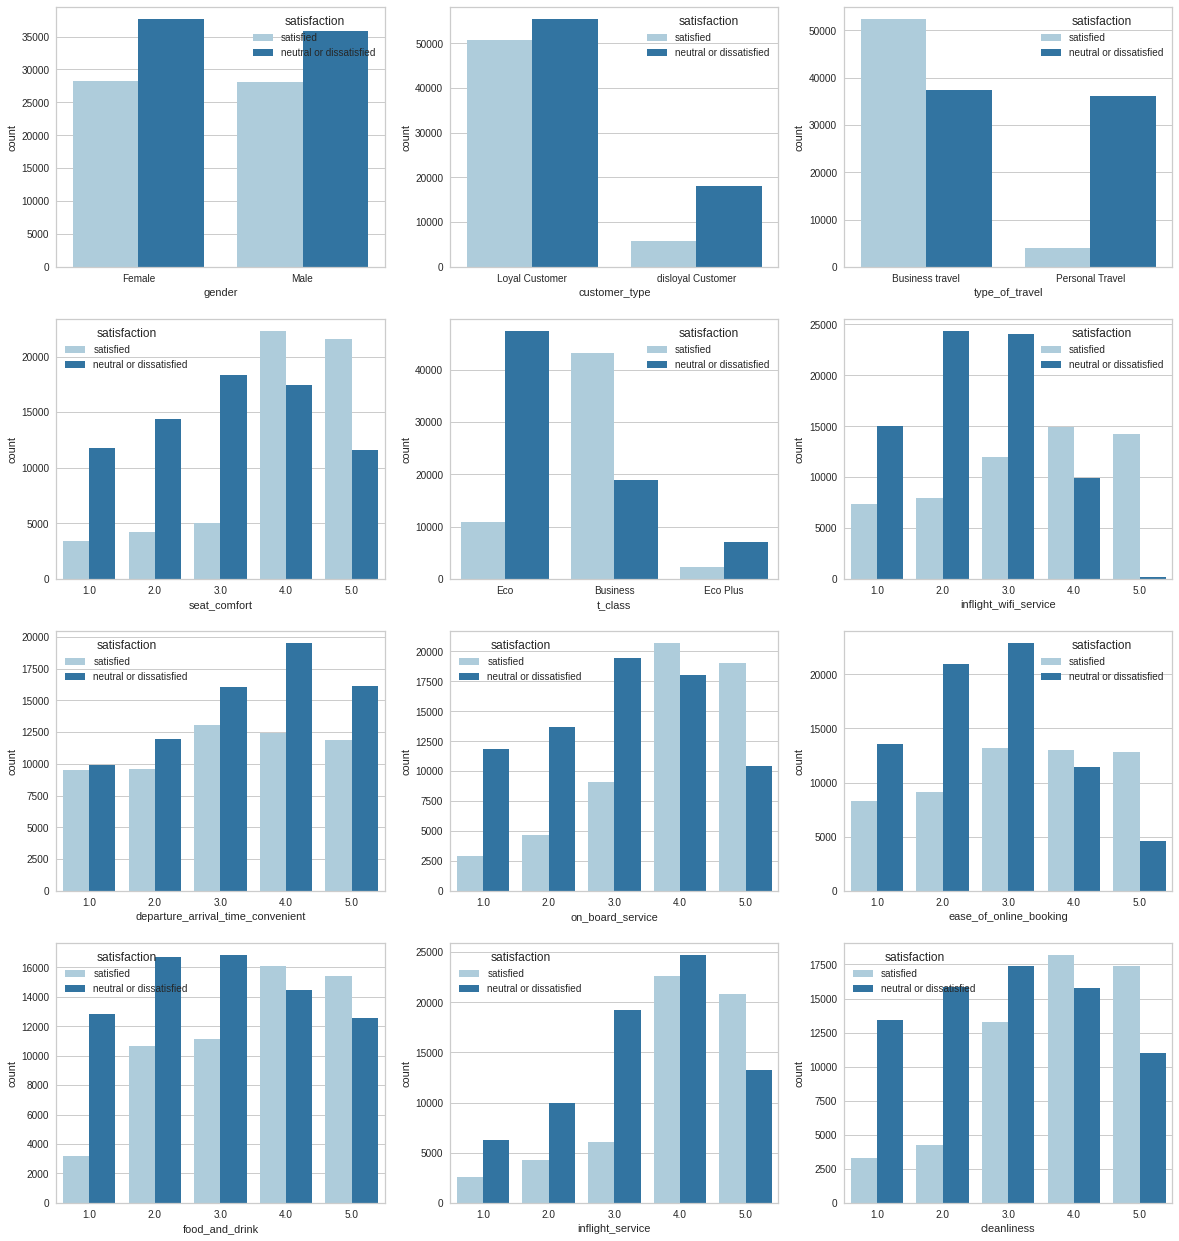

In [ ]:
#creamos grafico para ver el puntaje a cada servicio segun satisfaccion
fig, axes = plt.subplots(4, 3, figsize = (20, 22))
sns.countplot(x = 'gender', data = dftravel, hue= 'satisfaction',  palette= 'Paired', ax = axes[0, 0]);
sns.countplot(x = 'customer_type', data = dftravel, hue= 'satisfaction',  palette= 'Paired', ax = axes[0, 1]);
sns.countplot(x = 'type_of_travel', data = dftravel, hue= 'satisfaction',  palette= 'Paired', ax = axes[0, 2]);
sns.countplot(x = 'seat_comfort', data = dftravel, hue= 'satisfaction',  palette= 'Paired', ax = axes[1, 0]);
sns.countplot(x = 't_class', data = dftravel, hue= 'satisfaction',  palette= 'Paired', ax = axes[1, 1]);
sns.countplot(x = 'inflight_wifi_service', data = dftravel, hue= 'satisfaction',  palette= 'Paired', ax = axes[1, 2]);
sns.countplot(x = 'departure_arrival_time_convenient', data = dftravel, hue= 'satisfaction',  palette= 'Paired', ax = axes[2, 0]);
sns.countplot(x = 'on_board_service', data = dftravel, hue= 'satisfaction',  palette= 'Paired', ax = axes[2, 1]);
sns.countplot(x = 'ease_of_online_booking', data = dftravel, hue= 'satisfaction',  palette= 'Paired', ax = axes[2, 2]);
sns.countplot(x = 'food_and_drink', data = dftravel, hue= 'satisfaction',  palette= 'Paired', ax = axes[3, 0]);
sns.countplot(x = 'inflight_service', data = dftravel, hue= 'satisfaction',  palette= 'Paired', ax = axes[3,  1]);
sns.countplot(x = 'cleanliness', data = dftravel, hue= 'satisfaction',  palette= 'Paired', ax = axes[3, 2]);

notamos diferencia con el tipo de viaje , estan mas satisfechos pasajeros que viajan por business comparado con pasajeros que viajan por tipo personal 

# Analisis multivariado

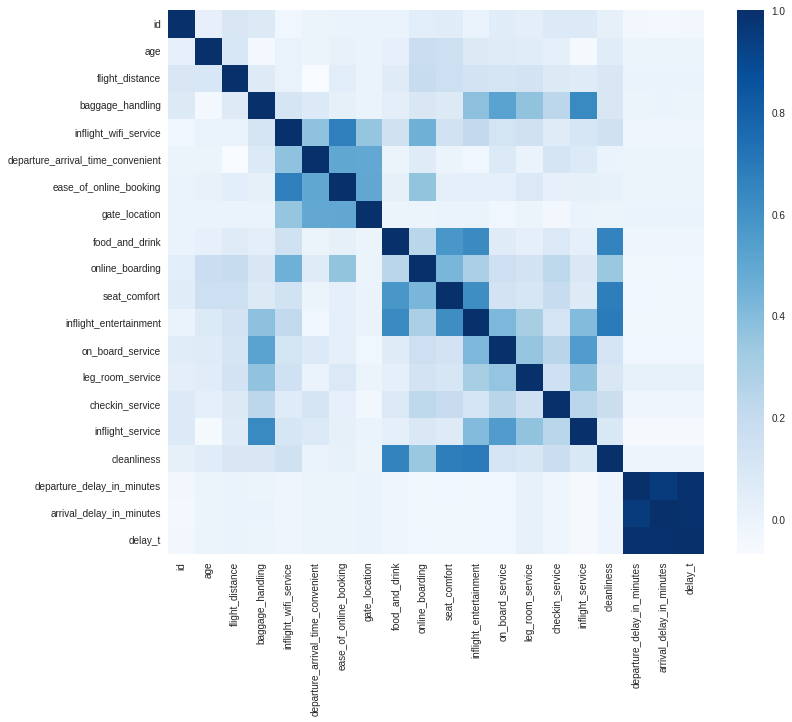

In [ ]:
#creamos un heatmap para visualizar la coorrelacion entre valores
plt.subplots(figsize=(12, 10))
sns.heatmap(dftravel.corr(),cmap="Blues");



se observa una correlacion fuerte entre departure_delay, arrival_delay y delay_t (esta ultima variable fue creada por nosotros)


In [ ]:
#Vemos la relacion entre departure y arrival delay.
plt.figure(figsize=(9,7))
sns.scatterplot('departure_delay_in_minutes','arrival_delay_in_minutes', data=dftravel,hue='satisfaction');

TypeError: ignored

<Figure size 648x504 with 0 Axes>

vemos la fuerte correlación entre el retraso de salida y el retraso de llegada; también podemos ver si el pasajero quedó satisfecho o no

# Preparamos antes de modelado


In [ ]:
#chequeo de variables categoricas pasarlas a numericas
dftravel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   t_class                            129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   baggage_handling                   129880 non-null  int64  
 8   satisfaction                       129880 non-null  object 
 9   inflight_wifi_service              129880 non-null  float64
 10  departure_arrival_time_convenient  129880 non-null  float64
 11  ease_of_online_booking             1298

In [ ]:
#seleccionamos las variables categoricas por un lado y las numericas por otro 
cat_object=dftravel.select_dtypes(include='object').columns
cat_numeric=dftravel.select_dtypes(include=np.number).columns

In [ ]:
#hacemos un loop para contar por unidad cuantas y cuales hay en cada variable
lista=[]

for col in cat_object:
  info=(col,dftravel[col].nunique(), dftravel[col].unique() )
  lista.append(info)
pd.DataFrame(lista, columns=['feature','cantidad','valores'])

,feature,cantidad,valores
0,gender,2,"[Female, Male]"
1,customer_type,2,"[Loyal Customer, disloyal Customer]"
2,type_of_travel,2,"[Business travel, Personal Travel]"
3,t_class,3,"[Eco, Business, Eco Plus]"
4,satisfaction,2,"[satisfied, neutral or dissatisfied]"


In [ ]:
#Encoding, los pasamos a numerico 
dftravel['gender'] = dftravel['gender'].map({'Male' : 0, 'Female' : 1})
dftravel['customer_type'] = dftravel['customer_type'].map({'Loyal Customer' : 0, 'disloyal Customer' : 1})
dftravel['type_of_travel'] = dftravel['type_of_travel'].map({'Personal Travel' : 0, 'Business travel' : 1})
dftravel['t_class'] = dftravel['t_class'].map({'Business' : 2, 'Eco Plus' : 1, 'Eco' : 0})
dftravel['satisfaction'] = dftravel['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})




In [ ]:
#chequeamos como queda
dftravel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   gender                             129880 non-null  int64  
 2   customer_type                      129880 non-null  int64  
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  int64  
 5   t_class                            129880 non-null  int64  
 6   flight_distance                    129880 non-null  int64  
 7   baggage_handling                   129880 non-null  int64  
 8   satisfaction                       129880 non-null  int64  
 9   inflight_wifi_service              129880 non-null  float64
 10  departure_arrival_time_convenient  129880 non-null  float64
 11  ease_of_online_booking             1298

no hay mas valores categoricos :)


In [ ]:
dftravel.head()

,id,gender,customer_type,age,type_of_travel,t_class,flight_distance,baggage_handling,satisfaction,inflight_wifi_service,...,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
0,19556,1,0,52,1,0,160,5,1,5.0,...,4.0,3.0,5.0,5.0,5.0,2.0,5.0,5.0,50.0,44.0
1,90035,1,0,36,1,2,2863,4,1,1.0,...,4.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,16.0,17.0
2,12360,0,1,20,1,0,192,3,0,2.0,...,2.0,2.0,2.0,4.0,1.0,2.0,2.0,2.0,16.0,17.0
3,77959,0,0,44,1,2,3377,1,1,3.0,...,4.0,4.0,1.0,1.0,1.0,3.0,1.0,4.0,16.0,6.0
4,36875,1,0,49,1,0,1182,2,1,2.0,...,1.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0,16.0,20.0


# Generacion de modelos

In [ ]:
#chequeo de desbalanceo
dftravel.satisfaction.value_counts(normalize=True)

0    0.565537
1    0.434463
Name: satisfaction, dtype: float64

no lo observamos tan desbalanceado

In [ ]:
from pandas.core.common import random_state
#split input y target
x= dftravel.drop('satisfaction',axis=1)
y= dftravel['satisfaction']

#split de modelo
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, random_state=10, stratify=y)
print(x_train.shape, y_train.shape)

(103904, 23) (103904,)


In [ ]:
x_train.head()

,id,gender,customer_type,age,type_of_travel,t_class,flight_distance,baggage_handling,inflight_wifi_service,departure_arrival_time_convenient,...,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
23775,46296,1,0,24,1,2,1800,2,3.0,5.0,...,3.0,3.0,3.0,2.0,4.0,2.0,3.0,3.0,16.0,17.0
92776,2188,0,1,34,1,0,624,1,3.0,3.0,...,3.0,2.0,2.0,4.0,4.0,2.0,2.0,2.0,16.0,17.0
41270,40925,0,0,37,1,1,574,4,4.0,4.0,...,4.0,4.0,4.0,5.0,4.0,1.0,4.0,4.0,5.0,5.0
77018,27243,0,0,59,0,0,1024,4,3.0,5.0,...,3.0,4.0,4.0,5.0,3.0,5.0,5.0,4.0,16.0,17.0
75134,80714,0,0,37,1,2,2483,2,2.0,2.0,...,3.0,4.0,2.0,2.0,1.0,3.0,2.0,2.0,16.0,1.0


# Entrenamiento del modelo

In [ ]:
from sklearn import tree
model_defaul = tree.DecisionTreeClassifier(random_state = 42)
model_defaul.fit(x_train, y_train)

model_max_depth = tree.DecisionTreeClassifier(random_state = 42, max_depth=7)
model_max_depth.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

# Prediccion


In [ ]:
y_pred_test = model_max_depth.predict(x_test)
y_pred_test

array([0, 0, 0, ..., 0, 1, 1])

# Metricas, lo evaluamos


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#accuracy
print('accuracy score for test data is:', accuracy_score(y_test, y_pred_test))
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['Actual 1', 'Actual 2']
confusion_matrix.columns =['Prediccion 1', 'Prediccion 2']
print (confusion_matrix)

accuracy score for test data is: 0.9210809978441639
          Prediccion 1  Prediccion 2
Actual 1         14105           585
Actual 2          1465          9821


/usr/local/lib/python3.9/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


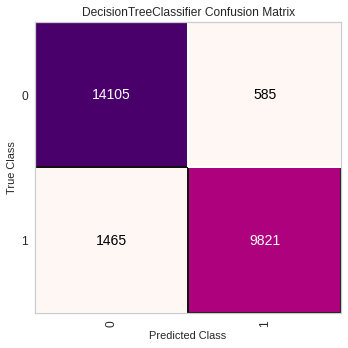

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5))
cm = ConfusionMatrix(model_max_depth, classes=[0,1], cmap='RdPu')
cm.score(x_test, y_test)
for label in cm.ax.texts:
  label.set_size(14)
cm.poof()

In [ ]:
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names, class_names, png_file_to_save):
    tree_str = export_graphviz(
        tree,
        out_file=None,
        feature_names=feature_names,
        class_names=class_names,
        rounded=True,
        filled=True
    )
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

#lista de variables
list_features = [x for x in dftravel.columns if x != 'satisfaction']
tree_graph_to_png(model_max_depth, list_features, dftravel.satisfaction.unique().astype(str), 'model.png')

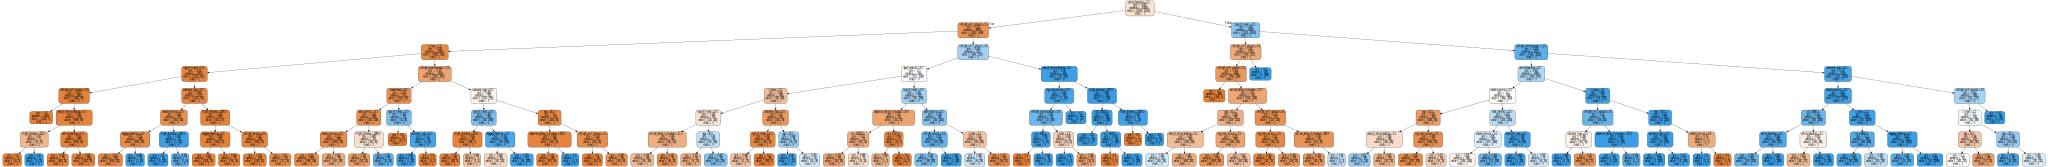

In [ ]:
#visualizamos el arbol 
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
list_features = [x for x in dftravel.columns if x != 'satisfaction']
data = export_graphviz(model_max_depth,out_file=None,feature_names=list_features,class_names=dftravel.satisfaction.unique().astype(str),   
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(data)
graph



# PREPARACION ANTES DEL MODELADO

En este caso en vez de utilizar el csv unificado Travel, utilizamos los csv Train y Test.


In [ ]:
df_test=pd.read_csv('test.csv',sep=',')
df_train=pd.read_csv('train.csv',sep=',')

In [ ]:
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# LLENADO DE NULOS

Verificamos que la variable Arrival Delay in Minutes tiene 310 nulos

In [ ]:
df_train.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

# RENOMBRAMOS VARIABLES

In [ ]:
#renombramos algunas variables que tienen mayusculas y espacios
df_train= df_train.rename(columns={'Gender': 'gender'})
df_train= df_train.rename(columns={'Customer Type': 'customer_type'})
df_train= df_train.rename(columns={'Age': 'age'})
df_train= df_train.rename(columns={'Type of Travel': 'type_of_travel'})
df_train= df_train.rename(columns={'Class': 't_class'})
df_train= df_train.rename(columns={'Flight Distance': 'flight_distance'})
df_train= df_train.rename(columns={'Inflight wifi service': 'inflight_wifi_service'})
df_train= df_train.rename(columns={'Departure/Arrival time convenient': 'departure_arrival_time_convenient'})
df_train= df_train.rename(columns={'Ease of Online booking': 'ease_of_online_booking'})
df_train= df_train.rename(columns={'Baggage handling': 'baggage_handling'})
df_train= df_train.rename(columns={'Checkin service': 'checkin_service'})
df_train= df_train.rename(columns={'Inflight service': 'inflight_service'})
df_train= df_train.rename(columns={'Cleanliness': 'cleanliness'})
df_train= df_train.rename(columns={'Departure Delay in Minutes': 'departure_delay_in_minutes'})
df_train= df_train.rename(columns={'Arrival Delay in Minutes': 'arrival_delay_in_minutes'})
df_train= df_train.rename(columns={'Online boarding': 'online_boarding'})
df_train= df_train.rename(columns={'On-board service': 'on_board_service'})
df_train= df_train.rename(columns={'Leg room service': 'leg_room_service'})
df_train= df_train.rename(columns={'Food and drink': 'food_and_drink'})
df_train= df_train.rename(columns={'Seat comfort': 'seat_comfort'})
df_train= df_train.rename(columns={'Gate location': 'gate_location'})
df_train= df_train.rename(columns={'Leg room service': 'leg_room_service'})
df_train= df_train.rename(columns={'Inflight entertainment': 'inflight_entertainment'})
df_train.head()

,Unnamed: 0,id,gender,customer_type,age,type_of_travel,t_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,...,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# LLENADO DE NULOS

In [ ]:
#llenados de nulos con la media

#arrival_delay_in_minutes

#obtencion de la media de la variable 
train_arrival_delay_in_minutes_mean = df_train['arrival_delay_in_minutes'].mean()
df_train.arrival_delay_in_minutes = df_train.arrival_delay_in_minutes.fillna(train_arrival_delay_in_minutes_mean)

In [ ]:
df_train['arrival_delay_in_minutes'].mean()

15.178678301832155

In [ ]:
# fill arrival_delay_in_minutes con la gender de la agrupacion gender y customer_type

#creo dataframe de referencia
arrival_delay_in_minutes_ref_null = df_train.groupby(['gender', 'customer_type']).median()['arrival_delay_in_minutes'].reset_index()

#funcion de replace en base a dataframe agrupado
def fill_na_arrival_delay_in_minutes_grouped(df_grouped , row_replace):
  if pd.isna(row_replace['arrival_delay_in_minutes']):
    return df_grouped[(df_grouped['gender'] == row_replace['gender']) & (df_grouped['customer_type'] == row_replace['customer_type'])]['arrival_delay_in_minutes'].value[0]
  else:
    return row_replace['arrival_delay_in_minutes']


#transformacion de train
df_train['arrival_delay_in_minutes'] = df_train.apply(lambda row: fill_na_arrival_delay_in_minutes_grouped(arrival_delay_in_minutes_ref_null, row), axis=1)

In [ ]:
arrival_delay_in_minutes_ref_null

,gender,customer_type,arrival_delay_in_minutes


In [ ]:
arrival_delay_in_minutes_ref_null[(arrival_delay_in_minutes_ref_null['gender'] == 'Female') & (arrival_delay_in_minutes_ref_null['customer_type'] == "Loyal Customer")]['arrival_delay_in_minutes']

0    0.0
Name: arrival_delay_in_minutes, dtype: float64

In [ ]:
df_train.head()

,Unnamed: 0,id,gender,customer_type,age,type_of_travel,t_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,...,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# ONE HOT ENCODER

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#generate one hot encoder class
encoder = OneHotEncoder(handle_unknown='ignore', #ponemos ignore para poder ommitir cuando puede pasar que no exista los mismos valores 
                        sparse=False) # generarlo como. matrix para poder generar las columnas adecuadas

#entrenamiento para genera el preprocesamiento one hot encoding para las variables indicadas
encoder.fit(df_train[['gender', 't_class', 'customer_type','type_of_travel','satisfaction']])

#transformo en train datasets en base a la clase generada
cat_encoding = pd.DataFrame(encoder.transform(df_train[['gender', 't_class', 'customer_type','type_of_travel','satisfaction']]), columns=encoder.get_feature_names_out())
cat_encoding.head()


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,gender_Female,gender_Male,t_class_Business,t_class_Eco,t_class_Eco Plus,customer_type_Loyal Customer,customer_type_disloyal Customer,type_of_travel_Business travel,type_of_travel_Personal Travel,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
encoder.get_feature_names_out()

array(['gender_Female', 'gender_Male', 't_class_Business', 't_class_Eco',
       't_class_Eco Plus', 'customer_type_Loyal Customer',
       'customer_type_disloyal Customer',
       'type_of_travel_Business travel', 'type_of_travel_Personal Travel',
       'satisfaction_neutral or dissatisfied', 'satisfaction_satisfied'],
      dtype=object)

In [ ]:
#joineo de las variables que deseo con categoricas encoding
df_all_train = pd.concat([df_train, cat_encoding], axis=1)


df_all_train.head()

,Unnamed: 0,id,gender,customer_type,age,type_of_travel,t_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,...,gender_Male,t_class_Business,t_class_Eco,t_class_Eco Plus,customer_type_Loyal Customer,customer_type_disloyal Customer,type_of_travel_Business travel,type_of_travel_Personal Travel,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
#Borrado de columnas no necesarias 
df_all_train.drop(['id', 'gender', 't_class', 'customer_type','type_of_travel'],axis=1, inplace=True)

#train datasets final
df_all_train.head()

,Unnamed: 0,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,...,gender_Male,t_class_Business,t_class_Eco,t_class_Eco Plus,customer_type_Loyal Customer,customer_type_disloyal Customer,type_of_travel_Business travel,type_of_travel_Personal Travel,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,0,13,460,3,4,3,1,5,3,5,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1,1,25,235,3,2,3,3,1,3,1,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,2,26,1142,2,2,2,2,5,5,5,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,3,25,562,2,5,5,5,2,2,2,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,4,61,214,3,3,3,3,4,5,5,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


# SPLITEO

In [ ]:
#spliteo de datos en target y features for test and train

#seleccion de x values sin el target
X_train = df_all_train.loc[:,df_all_train.columns != 'satisfaction']

#seleccion del target
y_train = df_all_train.satisfaction

# HACEMOS LOS MISMOS PASOS CON EL TEST.CSV

In [ ]:
#renombramos algunas variables que tienen mayusculas y espacios
df_test= df_test.rename(columns={'Gender': 'gender'})
df_test= df_test.rename(columns={'Customer Type': 'customer_type'})
df_test= df_test.rename(columns={'Age': 'age'})
df_test= df_test.rename(columns={'Type of Travel': 'type_of_travel'})
df_test= df_test.rename(columns={'Class': 't_class'})
df_test= df_test.rename(columns={'Flight Distance': 'flight_distance'})
df_test= df_test.rename(columns={'Inflight wifi service': 'inflight_wifi_service'})
df_test= df_test.rename(columns={'Departure/Arrival time convenient': 'departure_arrival_time_convenient'})
df_test= df_test.rename(columns={'Ease of Online booking': 'ease_of_online_booking'})
df_test= df_test.rename(columns={'Baggage handling': 'baggage_handling'})
df_test= df_test.rename(columns={'Checkin service': 'checkin_service'})
df_test= df_test.rename(columns={'Inflight service': 'inflight_service'})
df_test= df_test.rename(columns={'Cleanliness': 'cleanliness'})
df_test= df_test.rename(columns={'Departure Delay in Minutes': 'departure_delay_in_minutes'})
df_test= df_test.rename(columns={'Arrival Delay in Minutes': 'arrival_delay_in_minutes'})
df_test= df_test.rename(columns={'Online boarding': 'online_boarding'})
df_test= df_test.rename(columns={'On-board service': 'on_board_service'})
df_test= df_test.rename(columns={'Leg room service': 'leg_room_service'})
df_test= df_test.rename(columns={'Food and drink': 'food_and_drink'})
df_test= df_test.rename(columns={'Seat comfort': 'seat_comfort'})
df_test= df_test.rename(columns={'Gate location': 'gate_location'})
df_test= df_test.rename(columns={'Leg room service': 'leg_room_service'})
df_test= df_test.rename(columns={'Inflight entertainment': 'inflight_entertainment'})
df_test.head()

,Unnamed: 0,id,gender,customer_type,age,type_of_travel,t_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,...,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
#trasnformacion de test

#arrival_delay_in_minutes
df_test.arrival_delay_in_minutes = df_test.arrival_delay_in_minutes.fillna(train_arrival_delay_in_minutes_mean)

#gender
df_test['arrival_delay_in_minutes'] = df_test.apply(lambda row: fill_na_arrival_delay_in_minutes_grouped(arrival_delay_in_minutes_ref_null, row), axis=1)


#one hot encoding 
cat_encoding_test = pd.DataFrame(encoder.transform(df_test[['gender', 't_class', 'customer_type','type_of_travel','satisfaction']]), columns=encoder.get_feature_names_out())
df_all_test = pd.concat([df_test, cat_encoding_test], axis=1)

#borrado de las mismas variables 
df_all_test.drop(['id', 'gender', 't_class', 'customer_type','type_of_travel'],axis=1, inplace=True)

In [ ]:
# spliteo de datos y target del test
X_test = df_all_test.loc[:,df_all_test.columns != 'satisfaction'] 
y_test = df_all_test.satisfaction

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 30 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            103904 non-null  int64  
 1   age                                   103904 non-null  int64  
 2   flight_distance                       103904 non-null  int64  
 3   inflight_wifi_service                 103904 non-null  int64  
 4   departure_arrival_time_convenient     103904 non-null  int64  
 5   ease_of_online_booking                103904 non-null  int64  
 6   gate_location                         103904 non-null  int64  
 7   food_and_drink                        103904 non-null  int64  
 8   online_boarding                       103904 non-null  int64  
 9   seat_comfort                          103904 non-null  int64  
 10  inflight_entertainment                103904 non-null  int64  
 11  

In [ ]:
#seleccionamos las variables categoricas por un lado y las numericas por otro 
cat_object=df_test.select_dtypes(include='object').columns
cat_numeric=df_test.select_dtypes(include=np.number).columns

In [ ]:
#hacemos un loop para contar por unidad cuantas y cuales hay en cada variable
lista=[]

for col in cat_object:
  info=(col,df_test[col].nunique(), df_test[col].unique() )
  lista.append(info)
pd.DataFrame(lista, columns=['feature','cantidad','valores'])

,feature,cantidad,valores
0,gender,2,"[Female, Male]"
1,customer_type,2,"[Loyal Customer, disloyal Customer]"
2,type_of_travel,2,"[Business travel, Personal Travel]"
3,t_class,3,"[Eco, Business, Eco Plus]"
4,satisfaction,2,"[satisfied, neutral or dissatisfied]"


In [ ]:
#Encoding, los pasamos a numerico 
df_test['gender'] = df_test['gender'].map({'Male' : 0, 'Female' : 1})
df_test['customer_type'] = df_test['customer_type'].map({'Loyal Customer' : 0, 'disloyal Customer' : 1})
df_test['type_of_travel'] = df_test['type_of_travel'].map({'Personal Travel' : 0, 'Business travel' : 1})
df_test['t_class'] = df_test['t_class'].map({'Business' : 2, 'Eco Plus' : 1, 'Eco' : 0})
df_test['satisfaction'] = df_test['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})

# Training del Modelo con Hiperparametros

In [ ]:
#training del modelo
from sklearn import tree

model_default = tree.DecisionTreeClassifier(random_state = 42) # con hiperparametros default
model_default.fit(X_train, y_train)

#modelo generado con algun hiperparamtros diferente
model_max_depth = tree.DecisionTreeClassifier(random_state = 42, max_depth=7) 
model_max_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

# Predicción 


In [ ]:
y_pred_test = model_max_depth.predict(X_test)
y_pred_test

array(['satisfied', 'satisfied', 'neutral or dissatisfied', ...,
       'neutral or dissatisfied', 'satisfied', 'neutral or dissatisfied'],
      dtype=object)

# Metricas
En este caso ultilizaremos el Accuracy como metrica para determinar que un modelo es mucho mejor que otro

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#accuracy
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix.index = ['Prediccion1','Prediccion1']
confusion_matrix.columns = ['Prediccion2','Prediccion2']
print(confusion_matrix)

Accuracy score for test data is: 1.0
             Prediccion2  Prediccion2
Prediccion1        14573            0
Prediccion1            0        11403


/usr/local/lib/python3.9/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


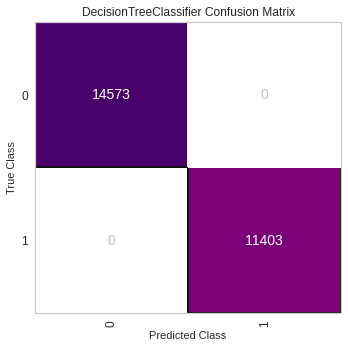

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5))
cm = ConfusionMatrix(model_max_depth, classes=[0, 1], cmap='RdPu')
cm.score(X_test, y_test)
for label in cm.ax.texts:
    label.set_size(14)
cm.poof()

# DECISION TREE

In [ ]:
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names, class_names, png_file_to_save):
    tree_str = export_graphviz(
        tree,
        out_file=None,
        feature_names=feature_names,
        class_names=class_names,
        rounded=True,
        filled=True
    )
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

#lista de variables
list_features = [x for x in df_all_train.columns if x != 'satisfaction']
tree_graph_to_png(model_max_depth, list_features, df_all_train.satisfaction.unique().astype(str), 'model.png')

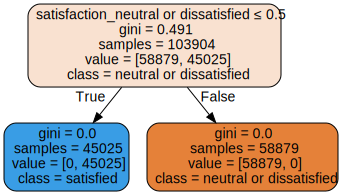

In [ ]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
list_features = [x for x in df_all_train.columns if x != 'satisfaction']
data = export_graphviz(model_max_depth,out_file=None,feature_names=list_features,class_names=df_all_train.satisfaction.unique().astype(str),   
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(data)
graph

# PCA

Realizamos un PCA. Volvemos a utilizar el "dftravel" el cual ya se encuentra normalizado

In [ ]:
#Importamos las librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler


from scipy import stats

In [ ]:
dftravel.head()



,id,gender,customer_type,age,type_of_travel,t_class,flight_distance,baggage_handling,satisfaction,inflight_wifi_service,...,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
0,19556,1,0,52,1,0,160,5,1,5.0,...,4.0,3.0,5.0,5.0,5.0,2.0,5.0,5.0,50.0,44.0
1,90035,1,0,36,1,2,2863,4,1,1.0,...,4.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,16.0,17.0
2,12360,0,1,20,1,0,192,3,0,2.0,...,2.0,2.0,2.0,4.0,1.0,2.0,2.0,2.0,16.0,17.0
3,77959,0,0,44,1,2,3377,1,1,3.0,...,4.0,4.0,1.0,1.0,1.0,3.0,1.0,4.0,16.0,6.0
4,36875,1,0,49,1,0,1182,2,1,2.0,...,1.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0,16.0,20.0


In [ ]:
dftravel.isnull().sum()

id                                   0
gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
t_class                              0
flight_distance                      0
baggage_handling                     0
satisfaction                         0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
on_board_service                     0
leg_room_service                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
dtype: int64

In [ ]:
dftravel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   gender                             129880 non-null  int64  
 2   customer_type                      129880 non-null  int64  
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  int64  
 5   t_class                            129880 non-null  int64  
 6   flight_distance                    129880 non-null  int64  
 7   baggage_handling                   129880 non-null  int64  
 8   satisfaction                       129880 non-null  int64  
 9   inflight_wifi_service              129880 non-null  float64
 10  departure_arrival_time_convenient  129880 non-null  float64
 11  ease_of_online_booking             1298

In [ ]:
dftravel.describe().T

,count,mean,std,min,25%,50%,75%,max
id,129880.0,64940.500000,37493.270818,1.0,32470.75,64940.5,97410.25,129880.0
gender,129880.0,0.507384,0.499947,0.0,0.00,1.0,1.00,1.0
customer_type,129880.0,0.183092,0.386743,0.0,0.00,0.0,0.00,1.0
age,129880.0,39.427957,15.119360,7.0,27.00,40.0,51.00,85.0
type_of_travel,129880.0,0.690584,0.462255,0.0,0.00,1.0,1.00,1.0
t_class,129880.0,1.029650,0.962636,0.0,0.00,1.0,2.00,2.0
flight_distance,129880.0,1190.316392,997.452477,31.0,414.00,844.0,1744.00,4983.0
baggage_handling,129880.0,3.632114,1.180025,1.0,3.00,4.0,5.00,5.0
satisfaction,129880.0,0.434463,0.495688,0.0,0.00,0.0,1.00,1.0
inflight_wifi_service,129880.0,2.819148,1.239631,1.0,2.00,3.0,4.00,5.0


In [ ]:
from pandas.core.common import random_state
#split input y target
x= dftravel.drop('satisfaction',axis=1)
y= dftravel['satisfaction']

#split de modelo
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, random_state=0, stratify=y)
print(x_train.shape, y_train.shape)

(103904, 23) (103904,)


In [ ]:
x_train.head()

,id,gender,customer_type,age,type_of_travel,t_class,flight_distance,baggage_handling,inflight_wifi_service,departure_arrival_time_convenient,...,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
23775,46296,1,0,24,1,2,1800,2,3.0,5.0,...,3.0,3.0,3.0,2.0,4.0,2.0,3.0,3.0,16.0,17.0
92776,2188,0,1,34,1,0,624,1,3.0,3.0,...,3.0,2.0,2.0,4.0,4.0,2.0,2.0,2.0,16.0,17.0
41270,40925,0,0,37,1,1,574,4,4.0,4.0,...,4.0,4.0,4.0,5.0,4.0,1.0,4.0,4.0,5.0,5.0
77018,27243,0,0,59,0,0,1024,4,3.0,5.0,...,3.0,4.0,4.0,5.0,3.0,5.0,5.0,4.0,16.0,17.0
75134,80714,0,0,37,1,2,2483,2,2.0,2.0,...,3.0,4.0,2.0,2.0,1.0,3.0,2.0,2.0,16.0,1.0


In [ ]:
y_pred_test = model_max_depth.predict(x_test)
y_pred_test

array([0, 0, 0, ..., 0, 1, 1])

# Test de Hipotesis

No pudimos determinar con exactitud porque el p_value da 0.0 en todos los casos.

Suponemos porque ya se encuentra normalizado.

In [ ]:
#seleccion de columnas normalizadas
normal_cols = []

#loop en todas las columnas del x_train
for col in x_train.columns:

  #calculo de D'Agostino's K-squared test
  k2, p_value = stats.normaltest(dftravel[col])
  #chequeo de si p-value es mayor a 0.05 es distribucion normal
  if p_value > 0.05:
    normal_cols.append(col)
  
  #print de todas las variables con su valor
  print(f"columna {col} ---- Estadístico = {k2}, p-value = {p_value}")

#seleccion de las variables que no estan en normal,  nos daran el resto de columnas no seleccionadas
#conjunto  de todas las columnas menos conjunto de las columnas normalizadas = resto de columnas a estudiar
not_stander = list(set(x_train.columns) - set(normal_cols))

columna id ---- Estadístico = 115203.5527023336, p-value = 0.0
columna gender ---- Estadístico = 442803.9073268474, p-value = 0.0
columna customer_type ---- Estadístico = 31661.381301342197, p-value = 0.0
columna age ---- Estadístico = 7524.6216624763765, p-value = 0.0
columna type_of_travel ---- Estadístico = 1146105.9592328065, p-value = 0.0
columna t_class ---- Estadístico = 464929.1788904409, p-value = 0.0
columna flight_distance ---- Estadístico = 18173.49421806513, p-value = 0.0
columna baggage_handling ---- Estadístico = 9483.456826517833, p-value = 0.0
columna inflight_wifi_service ---- Estadístico = 22237.41898374811, p-value = 0.0
columna departure_arrival_time_convenient ---- Estadístico = 67391.7680176144, p-value = 0.0
columna ease_of_online_booking ---- Estadístico = 29640.341531121892, p-value = 0.0
columna gate_location ---- Estadístico = 35627.860340114836, p-value = 0.0
columna food_and_drink ---- Estadístico = 80452.94892196605, p-value = 0.0
columna online_boarding 

<Axes: xlabel='customer_type', ylabel='Count'>

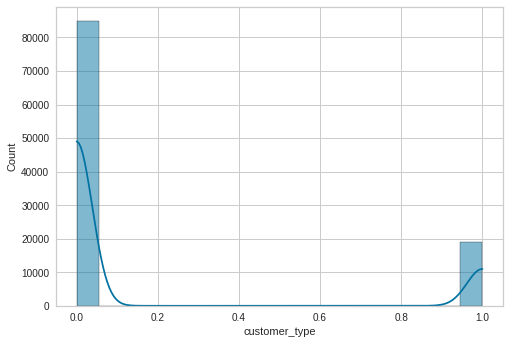

In [ ]:
import seaborn as sns

sns.histplot(x_train['customer_type'], kde=True)

# Utilizamos el PCA con la reduccion de dimension en 3 variables

In [ ]:
from sklearn.decomposition import PCA

#genero el modelo PCa con n variables(2)
pca = PCA(n_components = 3)

#entreno y trasnformo
x_train = pca.fit_transform(x_train)

#explicacion de variabilidad de datos
pca.explained_variance_ratio_

array([9.99296653e-01, 7.01370797e-04, 1.75722315e-06])

In [ ]:
x_train

array([[-1.85485846e+04,  6.55406234e+02, -1.18967299e+01],
       [-6.26594415e+04, -4.08032061e+02, -1.40862857e+01],
       [-2.39226943e+04, -5.56866542e+02, -2.82771931e+01],
       ...,
       [ 9.99931484e+03,  5.79582251e+02, -1.03975578e+01],
       [-3.38665127e+02, -9.67061991e+02, -1.06806704e+01],
       [-9.52282510e+03,  1.57397672e+02, -2.62015632e+01]])

# Entrenamos con un Decision Tree

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


Reg_Log = LogisticRegression(random_state = 0)
Reg_Log.fit(x_train, y_train)

rf = DecisionTreeClassifier(random_state=0)
rf.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier(random_state=0)

# Bajando la cantidad de columnas con un algoritmo sencillo obtuvimos una buena performance.

In [ ]:
y_pred = Reg_Log.predict(x_test)
y_pred_rf = rf.predict(x_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report

print('Logistc')
cm = classification_report(y_test, y_pred)
print(cm)

print('Decision')
cm_rf = classification_report(y_test, y_pred_rf)
print(cm_rf)

Logistc
              precision    recall  f1-score   support

           0       0.81      0.76      0.79     14690
           1       0.71      0.77      0.74     11286

    accuracy                           0.77     25976
   macro avg       0.76      0.77      0.76     25976
weighted avg       0.77      0.77      0.77     25976

Decision
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14690
           1       0.93      0.93      0.93     11286

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



# Analisis Factorial

In [ ]:
X = dftravel.iloc[:, 1:8]
X.head()

,gender,customer_type,age,type_of_travel,t_class,flight_distance,baggage_handling
0,1,0,52,1,0,160,5
1,1,0,36,1,2,2863,4
2,0,1,20,1,0,192,3
3,0,0,44,1,2,3377,1
4,1,0,49,1,0,1182,2


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled

array([[ 0.98533997, -0.47342178,  0.83152275, ..., -1.06961926,
        -1.03295183,  1.15920553],
       [ 0.98533997, -0.47342178, -0.22672718, ...,  1.00801644,
         1.67696215,  0.31176228],
       [-1.01487815,  2.11228136, -1.2849771 , ..., -1.06961926,
        -1.00086997, -0.53568096],
       ...,
       [-1.01487815,  2.11228136, -0.6235709 , ...,  1.00801644,
         0.8067419 ,  0.31176228],
       [ 0.98533997,  2.11228136, -1.15269586, ..., -1.06961926,
        -0.1908032 , -2.23056744],
       [-1.01487815, -0.47342178, -0.82199276, ...,  1.00801644,
         0.53404615,  0.31176228]])

In [ ]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 KB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.7/202.7 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 KB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 KB 32.2 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=95a4dc04f54b991808e21a9ab2ebbe2865588a25bb5e4364d0c3ed335c28349b
  Stored in directory: /root/.cache/pip/wheels/6d/32/bd/460a71becd83f7d77152f437c2fd451f5c87bc19cfcdbfcd24
Successfully built factor_analyzer


In [ ]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=2, rotation="varimax", method="principal", 
                    is_corr_matrix=False)
fa.fit(X_scaled)

FactorAnalyzer(method='principal', n_factors=2, rotation='varimax',
               rotation_kwargs={})

In [ ]:
print("Valores propios:")
print(fa.get_eigenvalues()[0])
print()
print("Communalities:")
print(fa.get_communalities())
print()
print("Varianzas especificas:")
print(fa.get_uniquenesses())
print()
print("Cargas de los factores:")
print(fa.loadings_)

Valores propios:
[1.91181681 1.42536526 1.04199134 0.96536135 0.83171675 0.51493446
 0.30881403]

Communalities:
[0.0061941  0.77451529 0.41574828 0.75583828 0.76301677 0.55873394
 0.0631354 ]

Varianzas especificas:
[0.9938059  0.22548471 0.58425172 0.24416172 0.23698323 0.44126606
 0.9368646 ]

Cargas de los factores:
[[ 0.00622452  0.07845607]
 [ 0.13351139  0.8698793 ]
 [ 0.09698957 -0.63744906]
 [ 0.82379578  0.27784672]
 [ 0.84929767 -0.20423086]
 [ 0.62227078 -0.41414131]
 [ 0.24245109  0.0659763 ]]


In [ ]:
pd.DataFrame(fa.loadings_ , columns = ['flight_distance', 'age'], index=X.columns)

,flight_distance,age
gender,0.006225,0.078456
customer_type,0.133511,0.869879
age,0.096990,-0.637449
type_of_travel,0.823796,0.277847
t_class,0.849298,-0.204231
flight_distance,0.622271,-0.414141
baggage_handling,0.242451,0.065976
